# **1. Demszky et al. (2020) - GoEmotions (Google Research)**

In [1]:
#  Importing Core libraries

# Core numerical + data handling
import numpy as np
import pandas as pd

# Plotting / visualization
import matplotlib.pyplot as plt
import seaborn as sns

# File handling
import zipfile
import os

# Simple sentiment analysis
from textblob import TextBlob

# Text feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Utilities
from collections import Counter
import warnings
from itertools import combinations

warnings.filterwarnings('ignore')

# Displaying settings
pd.set_option('display.max_colwidth', 200)
sns.set(style='whitegrid')

In [2]:
# Uploading Files to colab
from google.colab import files
uploaded = files.upload()

Saving goemotions_1.csv.zip to goemotions_1.csv.zip
Saving goemotions_2.csv.zip to goemotions_2.csv.zip
Saving goemotions_3.csv.zip to goemotions_3.csv.zip


In [3]:
# Unziping the Files
for filename in uploaded.keys():
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall()

print(" Extracted files:", os.listdir())

 Extracted files: ['.config', 'goemotions_1.csv', 'goemotions_3.csv.zip', 'goemotions_3.csv', 'goemotions_1.csv.zip', 'goemotions_2.csv.zip', 'goemotions_2.csv', 'sample_data']


In [4]:
# Loading and Combining CSV Files
df1 = pd.read_csv('goemotions_1.csv')
df2 = pd.read_csv('goemotions_2.csv')
df3 = pd.read_csv('goemotions_3.csv')

# Merging all splits into one dataframe
df = pd.concat([df1, df2, df3], ignore_index=True)
print(" combined shape:", df.shape)
df.head()

 combined shape: (211225, 37)


,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,">sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of ""grouping""",eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Falcon.",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Checking for missing values
print(df.isnull().sum())

# Dropping rows with missing text if any
df.dropna(subset=['text'], inplace=True)

# Basic cleaning
def preprocess(text_series):
    text_series = text_series.str.replace("(<br/>)", " ")
    text_series = text_series.str.replace('(<a).*(>).*(</a>)', ' ')
    text_series = text_series.str.replace('(&amp)', '&')
    text_series = text_series.str.replace('(&gt)', '>')
    text_series = text_series.str.replace('(&lt)', '<')
    text_series = text_series.str.replace('(\xa0)', ' ')
    return text_series
df['text'] = preprocess(df['text'])
print("cleaned text sample:")
df['text'].head()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64
cleaned text sample:


,text
0,That game hurt.
1,">sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of ""grouping"""
2,"You do right, if you don't care then fuck 'em!"
3,Man I love reddit.
4,"[NAME] was nowhere near them, he was by the Falcon."


In [6]:
# Sentiment Polarity and Text Stats

df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

df[['text', 'polarity', 'word_count', 'char_count']].head()

,text,polarity,word_count,char_count
0,That game hurt.,-0.400000,3,15
1,">sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of ""grouping""",0.000000,21,127
2,"You do right, if you don't care then fuck 'em!",-0.107143,10,46
3,Man I love reddit.,0.500000,4,18
4,"[NAME] was nowhere near them, he was by the Falcon.",0.100000,10,52


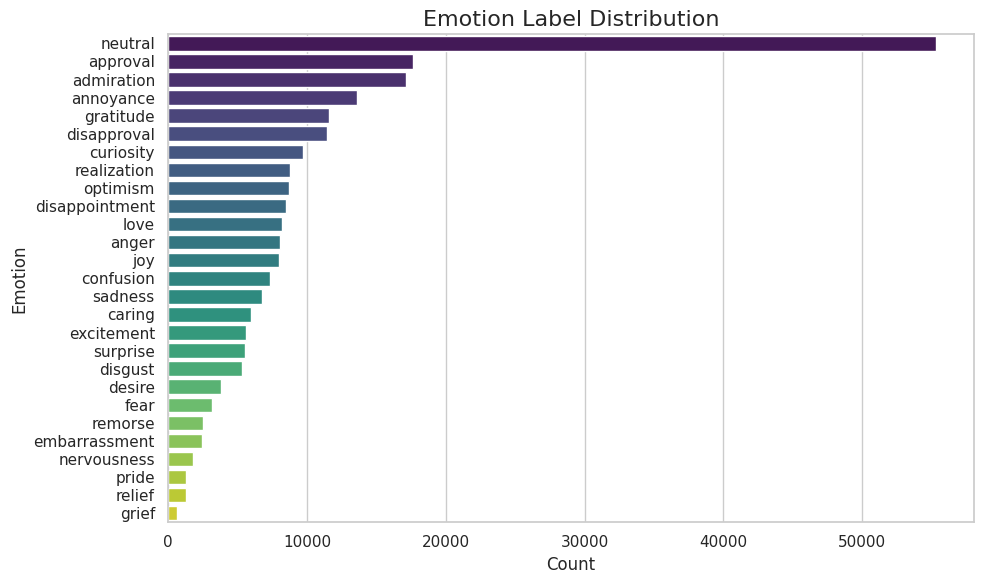

In [7]:
# All emotion label columns
emotion_cols = ['admiration', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
                'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
                'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
                'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
                'remorse', 'sadness', 'surprise', 'neutral']

#  Melting the dataframe for multi-label handling
#  Makes it easier to count and plot emotions
df_melted = df.melt(
    id_vars=[],                 # No other id columns needed for counting
    value_vars=emotion_cols,    # Columns to unpivot
    var_name='emotion',         # Name of the new column for emotion names
    value_name='value'          # Name of the new column for values
)

# Keep only the emotions present (value == 1)
df_melted = df_melted[df_melted['value'] == 1]

#  Ploting the distributionof how often each emotion appears
plt.figure(figsize=(10,6))
sns.countplot(
    y='emotion',
    data=df_melted,
    order=df_melted['emotion'].value_counts().index,
    palette='viridis'
)
plt.title('Emotion Label Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Emotion', fontsize=12)
plt.tight_layout()
plt.show()

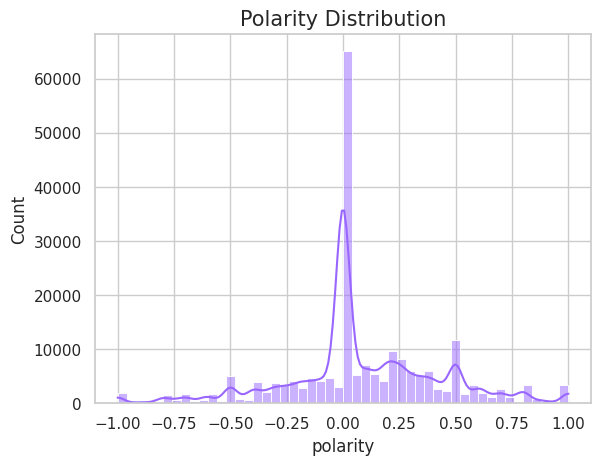

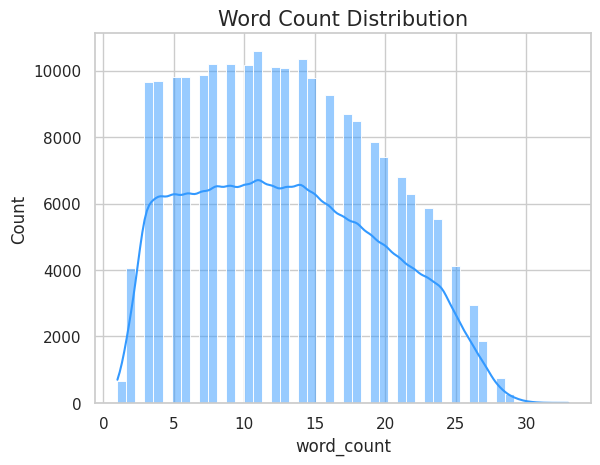

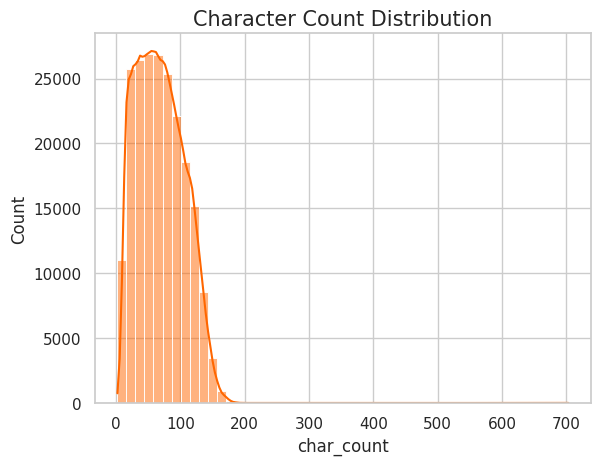

In [8]:
# Distribution of Polarity & Text Length
features = ['polarity', 'word_count', 'char_count']
titles = ['Polarity Distribution', 'Word Count Distribution', 'Character Count Distribution']
colors = ['#9966ff', '#3399ff', '#ff6600']

for feature, title, color in zip(features, titles, colors):
    sns.histplot(df[feature], bins=50, color=color, kde=True)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

In [9]:
# Example Texts by Polarity

print(" Positive samples:")
for text in df.loc[df.polarity > 0.5, 'text'].sample(5).values:
    print('-', text)

print("\n Neutral samples:")
for text in df.loc[(df.polarity > -0.1) & (df.polarity < 0.1), 'text'].sample(5).values:
    print('-', text)

print("\n Negative samples:")
for text in df.loc[df.polarity < -0.5, 'text'].sample(5).values:
    print('-', text)

 Positive samples:
- We have reached the stage where below 2 million is good. There truly is no bottom to this pit.
- omg that was full on Tequila [NAME]!!!
- Best of luck in your career :)
- That pizza looks good
- We should urge him to run, put our Sorosbux to some good use.

 Neutral samples:
- I would be creeped out.
- Yeah, and I don’t know why, it was totally out of character for me...
- *cries in south america*
- What if I told you that [NAME] and his supporters don't care about security. They just want to keep brown people out.
- Purdue's worst loss is Notre Dame (93 Kenpom) New Mexico is 187 in Kenpom. Good try tho

 Negative samples:
- Maybe I'm crazy but to me it looks like she's just giving a "thank you" nod
- Sorry, mom took it out of the oven already and I am STARVING!
- yeah it's not even a bad haircut
- That’s a horrible take.
- Makeup can be expensive! Even though she got her makeup done now, she will have to replace those that she lost


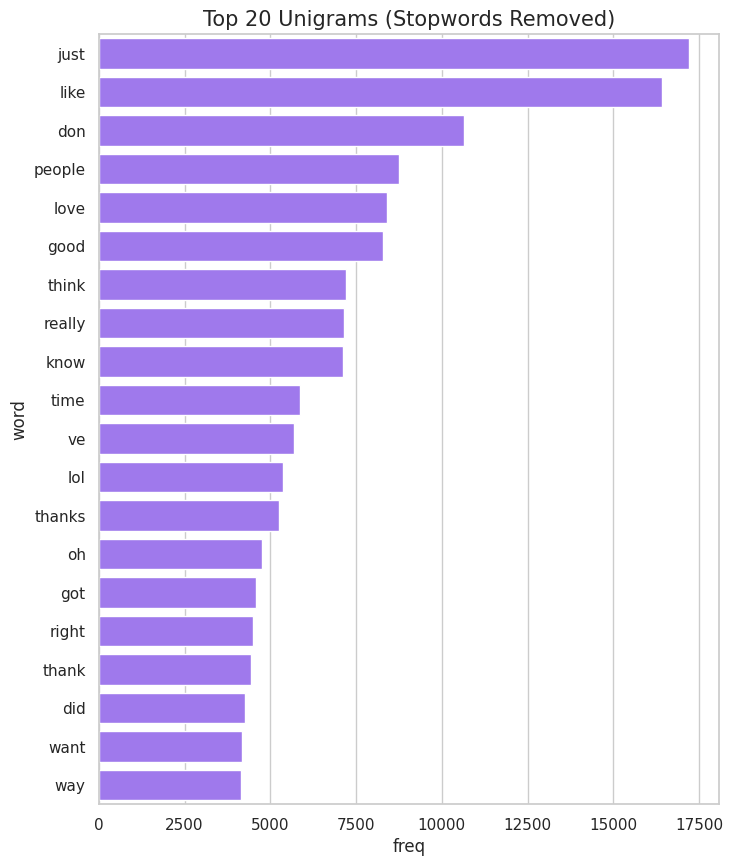

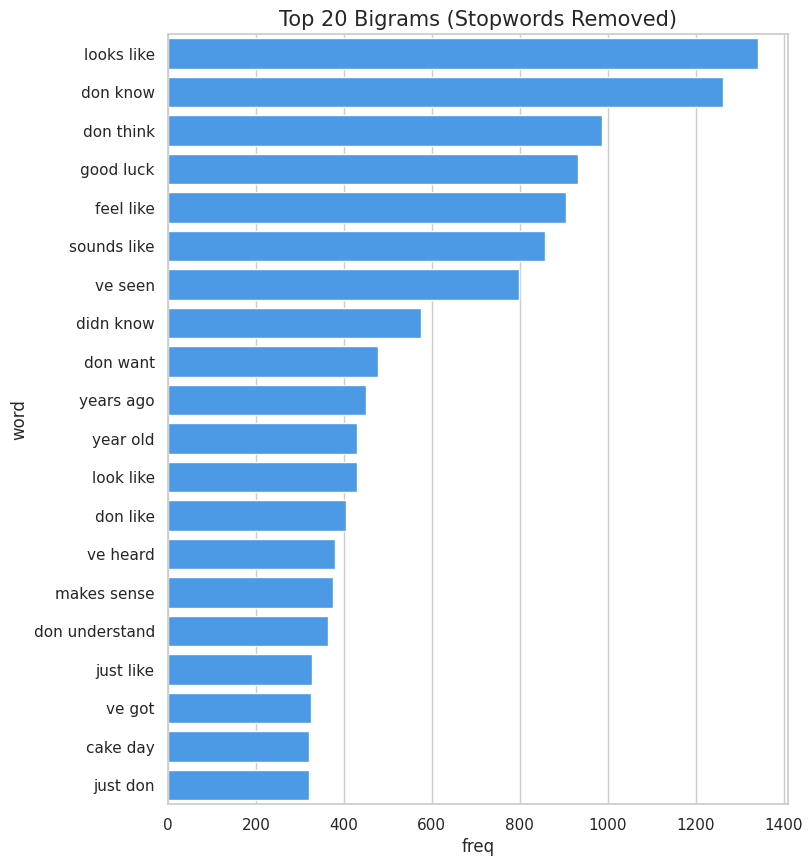

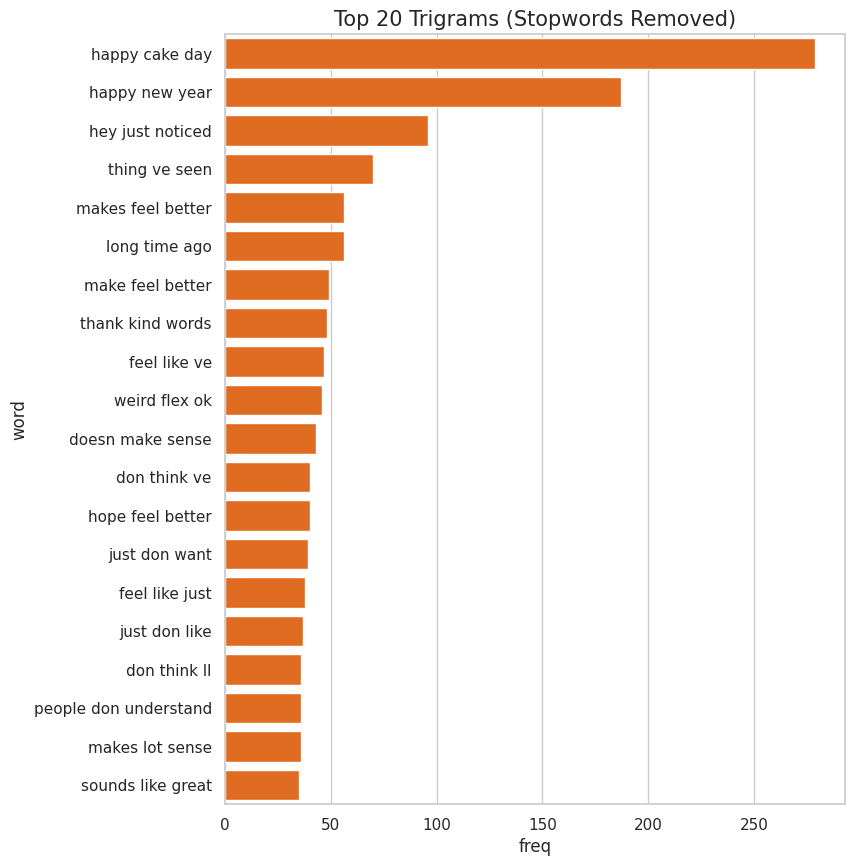

In [10]:
# N-gram Analysis

def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    common = words_freq[:n]
    return pd.DataFrame(common, columns=['word', 'freq'])

# Extract top unigrams, bigrams, trigrams
n = 20
unigrams = get_top_ngrams(df['text'], (1,1), stop_words='english', n=n)
bigrams = get_top_ngrams(df['text'], (2,2), stop_words='english', n=n)
trigrams = get_top_ngrams(df['text'], (3,3), stop_words='english', n=n)

plt.figure(figsize=(8,10))
sns.barplot(x='freq', y='word', data=unigrams, color='#9966ff')
plt.title('Top 20 Unigrams (Stopwords Removed)', size=15)
plt.show()

plt.figure(figsize=(8,10))
sns.barplot(x='freq', y='word', data=bigrams, color='#3399ff')
plt.title('Top 20 Bigrams (Stopwords Removed)', size=15)
plt.show()

plt.figure(figsize=(8,10))
sns.barplot(x='freq', y='word', data=trigrams, color='#ff6600')
plt.title('Top 20 Trigrams (Stopwords Removed)', size=15)
plt.show()

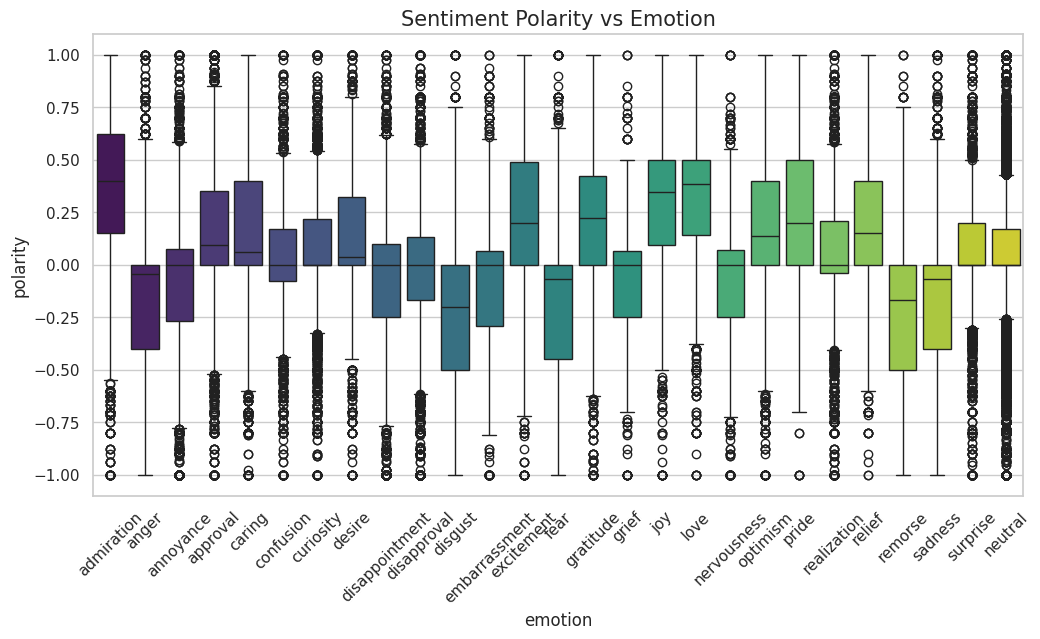

In [11]:
# Polarity vs Label

# Melt emotion columns
df_melted = df.melt(
    id_vars=['polarity'],
    value_vars=emotion_cols,
    var_name='emotion',
    value_name='value'
)

# Keep only rows with value == 1
df_melted = df_melted[df_melted['value'] == 1]

# Polarity vs Emotion
plt.figure(figsize=(12,6))
sns.boxplot(x='emotion', y='polarity', data=df_melted, palette='viridis')
plt.title('Sentiment Polarity vs Emotion', size=15)
plt.xticks(rotation=45)
plt.show()

In [12]:
# Summary
df_melted = df.melt(
    id_vars=[],
    value_vars=emotion_cols,
    var_name='emotion',
    value_name='value'
)

# Keep only rows with value == 1
df_melted = df_melted[df_melted['value'] == 1]

print("Total emotion entries:", len(df_melted))
print("Number of unique emotions:", df_melted['emotion'].nunique())
print("\nSample rows:")
df_melted.sample(27)

Total emotion entries: 240284
Number of unique emotions: 27

Sample rows:


,emotion,value
688869,approval,1
1416876,curiosity,1
191543,admiration,1
3758234,love,1
700525,approval,1
1673948,desire,1
477010,annoyance,1
4448332,realization,1
2116029,disgust,1
5123687,sadness,1


In [13]:
# Requirements
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, precision_recall_fscore_support
from scipy.stats import uniform, loguniform
import numpy as np
import pandas as pd
import time

# Preparing the data
def row_to_labels(row):
    return [emotion for emotion in emotion_cols if row[emotion] == 1]

if 'targets' not in df.columns:
    df['targets'] = df.apply(row_to_labels, axis=1)

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=emotion_cols)
y_all = mlb.fit_transform(df['targets'])
X_all = df['text']

# reset index
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.20, random_state=42, stratify=None
)
X_train_raw = X_train_raw.reset_index(drop=True)
X_test_raw = X_test_raw.reset_index(drop=True)

print("Train size:", len(X_train_raw), "Test size:", len(X_test_raw))


tfidf_params = dict(max_features=30000, ngram_range=(1,2), min_df=2)


# Baseline: TF-IDF + OneVsRest

baseline_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(**tfidf_params)),
    ('clf', OneVsRestClassifier(LogisticRegression(max_iter=2000, C=1.0, solver='liblinear', random_state=42)))
])

t0 = time.time()
baseline_pipeline.fit(X_train_raw, y_train)
t1 = time.time()
print(f"\nBaseline trained in {t1-t0:.1f}s")

y_pred_base = baseline_pipeline.predict(X_test_raw)
print("\n BASELINE LOGISTIC REGRESSION ")
print("F1-Micro:", f1_score(y_test, y_pred_base, average="micro"))
print("F1-Macro:", f1_score(y_test, y_pred_base, average="macro"))

Train size: 168980 Test size: 42245

Baseline trained in 51.9s

 BASELINE LOGISTIC REGRESSION 
F1-Micro: 0.23792113715574387
F1-Macro: 0.15240868360200696


In [14]:
# Requirements
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, precision_recall_fscore_support
from scipy.stats import uniform, loguniform
import numpy as np
import pandas as pd
import time

# Preparing multi label targets
def row_to_labels(row):
    return [emotion for emotion in emotion_cols if row[emotion] == 1] # collect all emotions marked as 1 for this row

# create target column if it doesn't already exist
if 'targets' not in df.columns:
    df['targets'] = df.apply(row_to_labels, axis=1)

# label lists into multi-hot vectors
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=emotion_cols)

y_all = mlb.fit_transform(df['targets'])
X_all = df['text']

# train / test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.20, random_state=42, stratify=None # multi-label so no stratification
)
# reset index
X_train_raw = X_train_raw.reset_index(drop=True)
X_test_raw = X_test_raw.reset_index(drop=True)

print("Train size:", len(X_train_raw), "Test size:", len(X_test_raw))

# shared TF-IDF settings
tfidf_params = dict(max_features=30000, ngram_range=(1,2), min_df=2)


# Baseline: TF-IDF + OneVsRest
baseline_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(**tfidf_params)), # convert text to TF-IDF features
    ('clf', OneVsRestClassifier(LogisticRegression(max_iter=2000, C=1.0, solver='liblinear', random_state=42))) # one-vs-rest for multi-label classification
])

# training baseline model
t0 = time.time()
baseline_pipeline.fit(X_train_raw, y_train)
t1 = time.time()

print(f"\nBaseline trained in {t1-t0:.1f}s")

# evaluating the baseline
y_pred_base = baseline_pipeline.predict(X_test_raw)
print("\n BASELINE LOGISTIC REGRESSION ")
print("F1-Micro:", f1_score(y_test, y_pred_base, average="micro"))
print("F1-Macro:", f1_score(y_test, y_pred_base, average="macro"))

Train size: 168980 Test size: 42245

Baseline trained in 54.1s

 BASELINE LOGISTIC REGRESSION 
F1-Micro: 0.23792113715574387
F1-Macro: 0.15240868360200696


In [15]:
# Classifier comparison

print(" CLASSIFIER COMPARISON ")
classifiers = {
    "Logistic Regression": OneVsRestClassifier(
        LogisticRegression(
            max_iter=2000,
            solver='liblinear',
            random_state=42,
            class_weight='balanced'
        )
    ),

    "Linear SVM": OneVsRestClassifier(
        LinearSVC(
            random_state=42,
            class_weight='balanced'
        )
    ),

    "Multinomial NB": OneVsRestClassifier(
        MultinomialNB()
    )
}

comparison_results = []
for name, clf in classifiers.items():
    # build pipeline per model
    pipe = Pipeline([('tfidf', TfidfVectorizer(**tfidf_params)), ('clf', clf)])

    t0 = time.time()
    pipe.fit(X_train_raw, y_train)
    t1 = time.time()

    y_pred = pipe.predict(X_test_raw)

    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    elapsed = t1 - t0

    print(f"{name}: F1-micro={f1_micro:.4f}, F1-macro={f1_macro:.4f}, time={elapsed:.1f}s")

    comparison_results.append([name, f1_micro, f1_macro, elapsed])

comp_df = pd.DataFrame(comparison_results, columns=['Model', 'F1-Micro', 'F1-Macro', 'Time_s'])

print("\nClassifier comparison summary:")
print(comp_df.sort_values('F1-Micro', ascending=False).reset_index(drop=True))

 CLASSIFIER COMPARISON 
Logistic Regression: F1-micro=0.3269, F1-macro=0.2840, time=86.9s
Linear SVM: F1-micro=0.3389, F1-macro=0.2906, time=391.7s
Multinomial NB: F1-micro=0.0923, F1-macro=0.0467, time=8.6s

Classifier comparison summary:
                 Model  F1-Micro  F1-Macro      Time_s
0           Linear SVM  0.338930  0.290592  391.653377
1  Logistic Regression  0.326899  0.284029   86.897551
2       Multinomial NB  0.092312  0.046666    8.622745


In [16]:
# hyperparameter optimization imports
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import time

# hyperparameter optimization
print("\n HYPERPARAMETER OPTIMIZATION (HPO) ")

# LOGISTIC REGRESSION HPO

logreg_pipeline = Pipeline([
    # converts text into TF-IDF features
    ('tfidf', TfidfVectorizer(
        stop_words='english'
    )),
    # one-vs-rest logistic regression for multi-label setup
    ('clf', OneVsRestClassifier(
        LogisticRegression(max_iter=2000, random_state=42)
    ))
])
# parameter search space
logreg_param_dist = {
    'clf__estimator__C': loguniform(1e-3, 10), # regularization strength
    'tfidf__max_features': [10000, 20000, 30000], # TF-IDF feature size
    'tfidf__ngram_range': [(1,1),(1,2)] # unigram vs unigram & bigram
}

# randomized search for faster exploration
logreg_search = RandomizedSearchCV(
    logreg_pipeline,
    param_distributions=logreg_param_dist,
    n_iter=10,
    scoring='f1_micro',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# running HPO
t0 = time.time()
logreg_search.fit(X_train_raw, y_train)
t1 = time.time()

print(f"\nLogReg HPO took {t1-t0:.1f}s")
print("Best params (Logistic Regression):", logreg_search.best_params_)

# best tuned logistic regression model
best_logreg = logreg_search.best_estimator_

# evaluate tuned logistic regression
y_pred_logreg = best_logreg.predict(X_test_raw)

print("\n HPO Logistic Regression results ")
print("F1-Micro:", f1_score(y_test, y_pred_logreg, average='micro'))
print("F1-Macro:", f1_score(y_test, y_pred_logreg, average='macro'))


 HYPERPARAMETER OPTIMIZATION (HPO) 
Fitting 3 folds for each of 10 candidates, totalling 30 fits

LogReg HPO took 237.1s
Best params (Logistic Regression): {'clf__estimator__C': np.float64(0.8471801418819978), 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 1)}

 HPO Logistic Regression results 
F1-Micro: 0.21078806426931906
F1-Macro: 0.1478113019940074


In [17]:
# LINEARSVC HPO
print("Running HPO for LinearSVC")

svm_pipeline = Pipeline([
    # TF-IDF text vectorization
    ('tfidf', TfidfVectorizer(
        stop_words='english'
    )),
    # linear SVM wrapped in one-vs-rest
    ('clf', OneVsRestClassifier(
        LinearSVC(random_state=42)
    ))
])

# parameter search space for SVM
svm_param_dist = {
    'clf__estimator__C': loguniform(1e-3, 10), # margin regularization

    # Full TF-IDF search
    'tfidf__max_features': [15000, 30000],
    'tfidf__ngram_range': [(1,1), (1,2)]
}

svm_search = RandomizedSearchCV(
    svm_pipeline,
    param_distributions=svm_param_dist,
    n_iter=8,
    scoring='f1_micro',
    cv=2,
    random_state=42,
    verbose=1,
    n_jobs=-1
)
# running HPO
t0 = time.time()
svm_search.fit(X_train_raw, y_train)
t1 = time.time()

print(f"\nLinearSVC HPO took {t1-t0:.1f}s")
print("Best params (LinearSVC):", svm_search.best_params_)

# best tuned SVM model
best_svm = svm_search.best_estimator_

# evaluate tuned SVM
y_pred_svm = best_svm.predict(X_test_raw)

print("\nHPO LinearSVC results ")
print("F1-Micro:", f1_score(y_test, y_pred_svm, average='micro'))
print("F1-Macro:", f1_score(y_test, y_pred_svm, average='macro'))

Running HPO for LinearSVC
Fitting 2 folds for each of 8 candidates, totalling 16 fits

LinearSVC HPO took 265.0s
Best params (LinearSVC): {'clf__estimator__C': np.float64(2.1368329072358767), 'tfidf__max_features': 30000, 'tfidf__ngram_range': (1, 2)}

HPO LinearSVC results 
F1-Micro: 0.3123741197571338
F1-Macro: 0.23401827413786477


In [18]:
# Error analysis

def run_error_analysis(model, model_name, X_test_raw, y_test):
    print(f"\n ERROR ANALYSIS: {model_name} ")
    # ensure y_test is numpy array
    y_test_arr = y_test if isinstance(y_test, np.ndarray) else y_test.values
    # Predict
    y_pred = model.predict(X_test_raw)
    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test_arr, y_pred),
        'f1_micro': f1_score(y_test_arr, y_pred, average='micro', zero_division=0),
        'f1_macro': f1_score(y_test_arr, y_pred, average='macro', zero_division=0)
    }

    print(pd.DataFrame([metrics]))

    # Per class precision/recall/f1
    prf = precision_recall_fscore_support(y_test_arr, y_pred, average=None, zero_division=0)
    per_class_df = pd.DataFrame({
        'class': mlb.classes_,
        'precision': prf[0],
        'recall': prf[1],
        'f1': prf[2],
        'support': prf[3]
    }).sort_values('f1')
    print("\nWorst 10 classes by F1:\n", per_class_df.head(10))

    # find misclassified examples
    errors = []
    for i in range(len(y_test_arr)):
        true_i = y_test_arr[i]
        pred_i = y_pred[i]
        num_mistakes = int(np.sum(true_i != pred_i))
        if num_mistakes > 0:
            errors.append({
                'index': i,
                'text': X_test_raw.iat[i],
                'true_label_indices': np.where(true_i==1)[0].tolist(),
                'pred_label_indices': np.where(pred_i==1)[0].tolist(),
                'num_mistakes': num_mistakes
            })

    errors_df = pd.DataFrame(errors).sort_values('num_mistakes', ascending=False).reset_index(drop=True)
    print(f"Total misclassified test rows: {len(errors_df)} / {len(y_test_arr)}")
    return errors_df, per_class_df, metrics

# Run error analysis for each model
baseline_errors, baseline_perclass, baseline_metrics = run_error_analysis(
    baseline_pipeline, "Baseline Logistic Regression", X_test_raw, y_test
)

hpo_logreg_errors, hpo_logreg_perclass, hpo_logreg_metrics = run_error_analysis(
    best_logreg, "HPO Logistic Regression", X_test_raw, y_test
)

hpo_svm_errors, hpo_svm_perclass, hpo_svm_metrics = run_error_analysis(
    best_svm, "HPO Linear SVM", X_test_raw, y_test
)

# Save top misclassifications for inspection
baseline_errors.head(20).to_csv('baseline_misclassified_samples.csv', index=False)
hpo_logreg_errors.head(20).to_csv('hpo_logreg_misclassified_samples.csv', index=False)
hpo_svm_errors.head(20).to_csv('hpo_svm_misclassified_samples.csv', index=False)

print("\nSaved CSVs: baseline_misclassified_samples.csv, hpo_logreg_misclassified_samples.csv, hpo_svm_misclassified_samples.csv")

# summary
summary = pd.DataFrame([
    ['Baseline LogisticRegression', baseline_metrics['f1_micro'], baseline_metrics['f1_macro']],
    ['HPO LogisticRegression', hpo_logreg_metrics['f1_micro'], hpo_logreg_metrics['f1_macro']],
    ['HPO LinearSVC', hpo_svm_metrics['f1_micro'], hpo_svm_metrics['f1_macro']]
], columns=['Model','F1-Micro','F1-Macro'])

print("\n FINAL SUMMARY ")
print(summary.sort_values('F1-Micro', ascending=False).reset_index(drop=True))


 ERROR ANALYSIS: Baseline Logistic Regression 
   accuracy  f1_micro  f1_macro
0   0.16802  0.237921  0.152409

Worst 10 classes by F1:
              class  precision    recall        f1  support
15           grief   0.000000  0.000000  0.000000      115
22          relief   0.000000  0.000000  0.000000      257
21     realization   0.608696  0.008163  0.016110     1715
2        annoyance   0.333333  0.009184  0.017876     2722
8   disappointment   0.629630  0.010174  0.020024     1671
11   embarrassment   0.583333  0.013944  0.027237      502
18     nervousness   0.750000  0.016438  0.032172      365
9      disapproval   0.504950  0.022280  0.042678     2289
20           pride   0.666667  0.023077  0.044610      260
3         approval   0.604061  0.034816  0.065837     3418
Total misclassified test rows: 35147 / 42245

 ERROR ANALYSIS: HPO Logistic Regression 
   accuracy  f1_micro  f1_macro
0  0.147899  0.210788  0.147811

Worst 10 classes by F1:
              class  precision    re


Showing confusion matrices for: Baseline LogReg


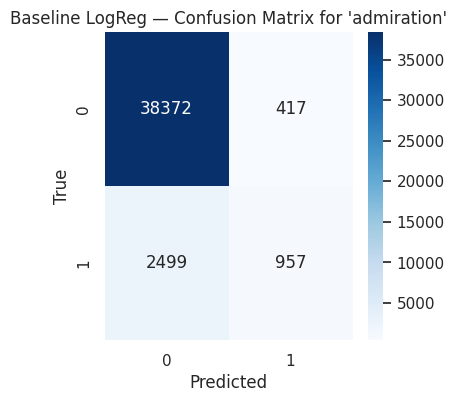

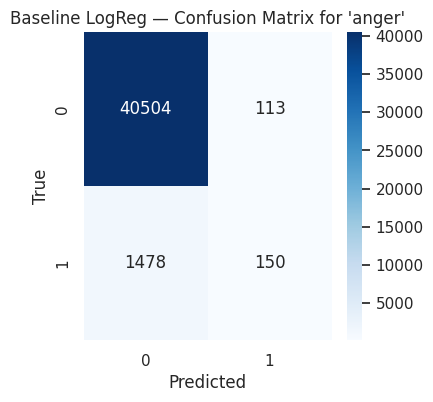

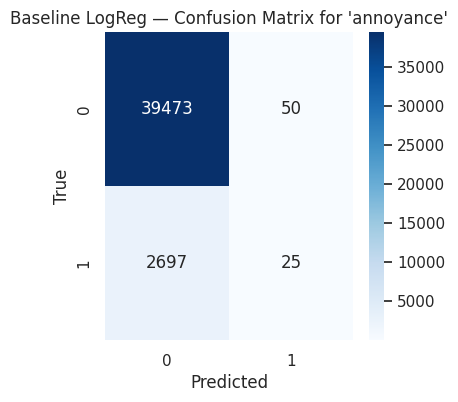

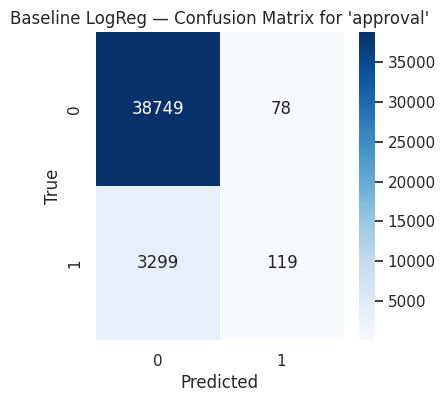

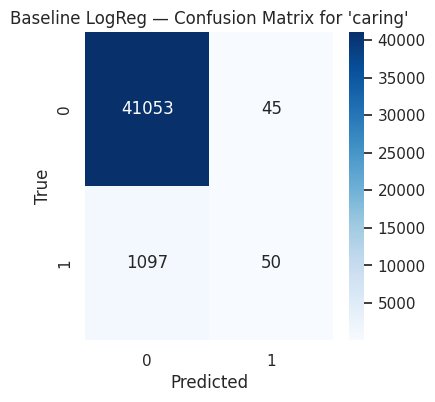


Showing confusion matrices for: HPO LogisticRegression


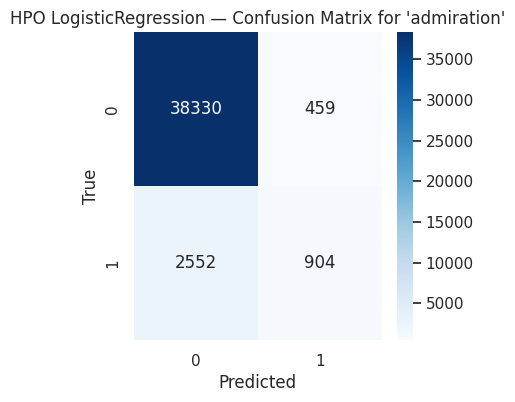

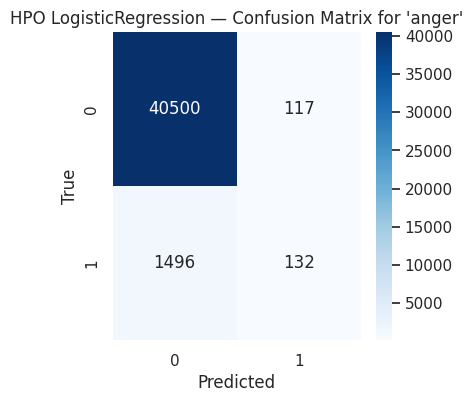

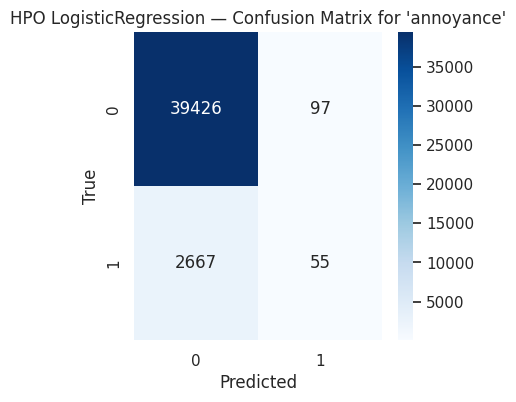

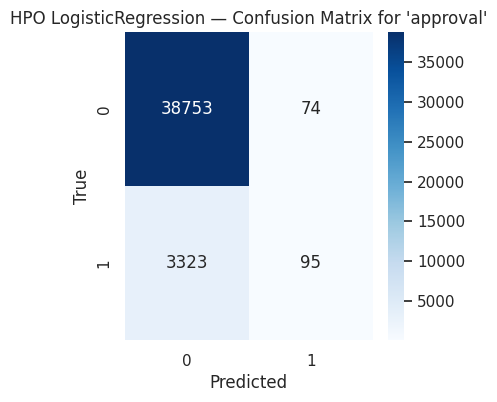

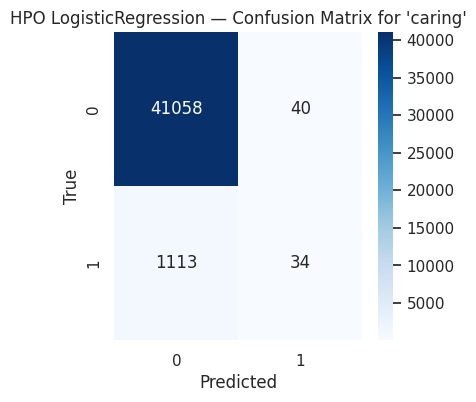


Showing confusion matrices for: HPO LinearSVC


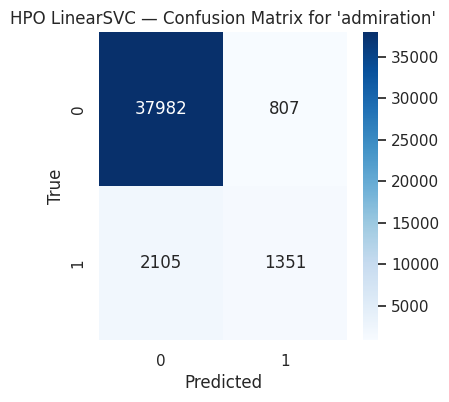

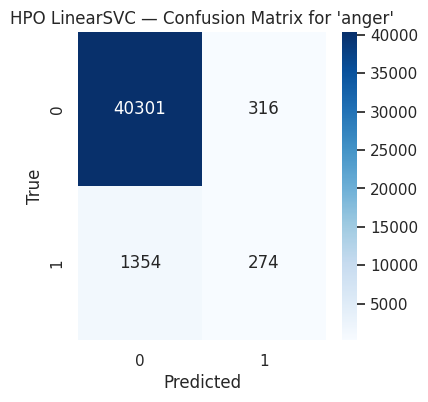

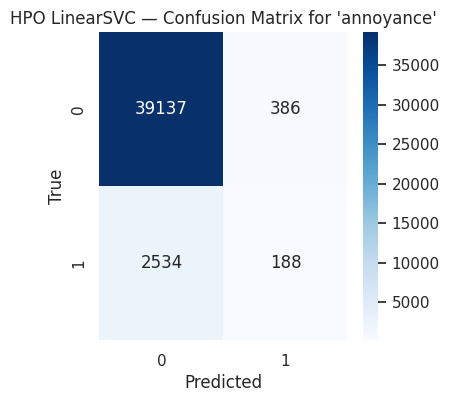

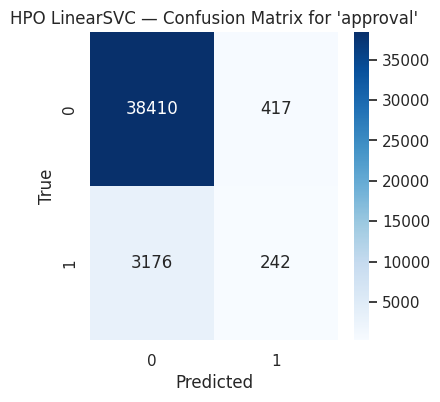

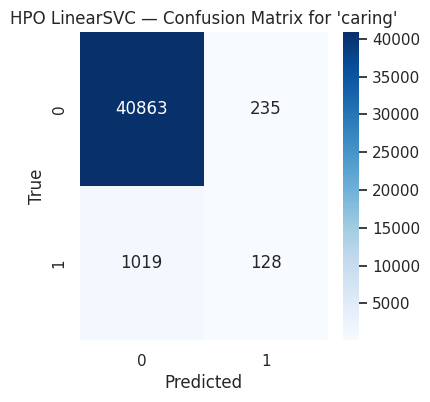


 MOST CONFUSED LABEL PAIRS — Baseline LogReg 

Common Missing vs Incorrectly Added (FN → FP):
  Missing 'approval' → Added 'neutral' : 260
  Missing 'annoyance' → Added 'neutral' : 164
  Missing 'disapproval' → Added 'neutral' : 156
  Missing 'curiosity' → Added 'neutral' : 142
  Missing 'realization' → Added 'neutral' : 112
  Missing 'confusion' → Added 'neutral' : 103
  Missing 'neutral' → Added 'admiration' : 80
  Missing 'anger' → Added 'neutral' : 75
  Missing 'neutral' → Added 'curiosity' : 73
  Missing 'admiration' → Added 'love' : 71

 MOST CONFUSED LABEL PAIRS — HPO LogisticRegression 

Common Missing vs Incorrectly Added (FN → FP):
  Missing 'approval' → Added 'neutral' : 206
  Missing 'disapproval' → Added 'neutral' : 125
  Missing 'curiosity' → Added 'neutral' : 122
  Missing 'confusion' → Added 'neutral' : 100
  Missing 'annoyance' → Added 'neutral' : 99
  Missing 'realization' → Added 'neutral' : 98
  Missing 'neutral' → Added 'admiration' : 86
  Missing 'neutral' → Adde

,emotion,precision,recall,f1,support
15,grief,0.000000,0.000000,0.000000,115
22,relief,0.000000,0.000000,0.000000,257
21,realization,0.608696,0.008163,0.016110,1715
2,annoyance,0.333333,0.009184,0.017876,2722
8,disappointment,0.629630,0.010174,0.020024,1671
11,embarrassment,0.583333,0.013944,0.027237,502
18,nervousness,0.750000,0.016438,0.032172,365
9,disapproval,0.504950,0.022280,0.042678,2289
20,pride,0.666667,0.023077,0.044610,260
3,approval,0.604061,0.034816,0.065837,3418



PER-LABEL METRICS — HPO LogisticRegression 


,emotion,precision,recall,f1,support
22,relief,0.000000,0.000000,0.000000,257
9,disapproval,0.400000,0.007864,0.015424,2289
21,realization,0.629630,0.009913,0.019518,1715
8,disappointment,0.487179,0.011370,0.022222,1671
15,grief,0.500000,0.017391,0.033613,115
2,annoyance,0.361842,0.020206,0.038274,2722
18,nervousness,0.375000,0.024658,0.046272,365
20,pride,0.777778,0.026923,0.052045,260
3,approval,0.562130,0.027794,0.052969,3418
4,caring,0.459459,0.029643,0.055692,1147



PER-LABEL METRICS — HPO LinearSVC 


,emotion,precision,recall,f1,support
8,disappointment,0.276873,0.050868,0.085945,1671
21,realization,0.316176,0.050146,0.086563,1715
22,relief,0.333333,0.054475,0.093645,257
18,nervousness,0.304348,0.057534,0.096774,365
9,disapproval,0.328798,0.063346,0.106227,2289
15,grief,0.250000,0.069565,0.108844,115
2,annoyance,0.327526,0.069067,0.114078,2722
3,approval,0.367223,0.070802,0.118715,3418
12,excitement,0.388000,0.086530,0.141503,1121
5,confusion,0.396450,0.091593,0.148806,1463



 ERROR TABLE — Baseline LogReg 
Total incorrect predictions: 35147 / 42245


,index,text,true,pred,missing_labels,extra_labels,num_errors
33454,40199,"Yeah. All they have to do is ask for absolution, which means [NAME] can live a life of sin and repent and go to their heaven.","[disapproval, disgust, embarrassment, gratitude, nervousness, realization, sadness]",[neutral],"[disapproval, disgust, embarrassment, gratitude, nervousness, realization, sadness]",[neutral],8
17630,21063,"As a vegan, I can't tell you how happy I am to find any restaurant with vegan options! That man should be showering you with gratitude.","[admiration, excitement, gratitude, joy, love, optimism, pride]",[],"[admiration, excitement, gratitude, joy, love, optimism, pride]",[],7
24132,28913,There is something legitimately wrong with you,"[admiration, approval, disappointment, disapproval, disgust, embarrassment, nervousness]",[],"[admiration, approval, disappointment, disapproval, disgust, embarrassment, nervousness]",[],7
20566,24614,"This movie, though simple but effective, shows how it is being jammed in your face is because it was just one police officer, chill.","[admiration, confusion, desire, excitement, grief, realization, surprise]",[],"[admiration, confusion, desire, excitement, grief, realization, surprise]",[],7
8947,10681,"#YOU'RE RIGHT, PEOPLE BEING OUTRAGED BY THE ACTIONS OF A CRIMINAL IS HYSTERICAL!","[confusion, curiosity, fear, gratitude, optimism, pride, surprise]",[],"[confusion, curiosity, fear, gratitude, optimism, pride, surprise]",[],7
31830,38244,HAS THE WHOLE WORLD GONE CRAZY‽ AM I THE ONLY ONE WHO GIVES A SHIT ABOUT THE RULES‽ MARK IT ZERO!,"[annoyance, curiosity, disgust, embarrassment, fear, grief, realization]",[],"[annoyance, curiosity, disgust, embarrassment, fear, grief, realization]",[],7
23473,28103,Happy day! Five years from now you will be a top ten player in the NHL.,"[admiration, desire, excitement, gratitude, joy, optimism, pride]",[],"[admiration, desire, excitement, gratitude, joy, optimism, pride]",[],7
28705,34453,"They should build the wall out of [NAME] emails. After all, no one can get over them.","[admiration, disappointment, embarrassment, gratitude, nervousness, remorse]",[neutral],"[admiration, disappointment, embarrassment, gratitude, nervousness, remorse]",[neutral],7
2668,3203,"See also: ""Useless College Degrees From Prestigious and Ridiculously Overpriced Universities""","[disappointment, disgust, embarrassment, nervousness, sadness, surprise]",[neutral],"[disappointment, disgust, embarrassment, nervousness, sadness, surprise]",[neutral],7
17873,21344,"Of course they do, feminists are self-absorbed pigs that just want to control everything and never be held accountable for anything.","[anger, disappointment, disgust, embarrassment, grief, remorse]",[],"[anger, disappointment, disgust, embarrassment, grief, remorse]",[],6



 ERROR TABLE — HPO LogisticRegression 
Total incorrect predictions: 35997 / 42245


,index,text,true,pred,missing_labels,extra_labels,num_errors
9133,10681,"#YOU'RE RIGHT, PEOPLE BEING OUTRAGED BY THE ACTIONS OF A CRIMINAL IS HYSTERICAL!","[confusion, curiosity, fear, gratitude, optimism, pride, surprise]",[],"[confusion, curiosity, fear, gratitude, optimism, pride, surprise]",[],7
32591,38244,HAS THE WHOLE WORLD GONE CRAZY‽ AM I THE ONLY ONE WHO GIVES A SHIT ABOUT THE RULES‽ MARK IT ZERO!,"[annoyance, curiosity, disgust, embarrassment, fear, grief, realization]",[],"[annoyance, curiosity, disgust, embarrassment, fear, grief, realization]",[],7
29380,34453,"They should build the wall out of [NAME] emails. After all, no one can get over them.","[admiration, disappointment, embarrassment, gratitude, nervousness, remorse]",[neutral],"[admiration, disappointment, embarrassment, gratitude, nervousness, remorse]",[neutral],7
18003,21063,"As a vegan, I can't tell you how happy I am to find any restaurant with vegan options! That man should be showering you with gratitude.","[admiration, excitement, gratitude, joy, love, optimism, pride]",[],"[admiration, excitement, gratitude, joy, love, optimism, pride]",[],7
34248,40199,"Yeah. All they have to do is ask for absolution, which means [NAME] can live a life of sin and repent and go to their heaven.","[disapproval, disgust, embarrassment, gratitude, nervousness, realization, sadness]",[],"[disapproval, disgust, embarrassment, gratitude, nervousness, realization, sadness]",[],7
21024,24614,"This movie, though simple but effective, shows how it is being jammed in your face is because it was just one police officer, chill.","[admiration, confusion, desire, excitement, grief, realization, surprise]",[],"[admiration, confusion, desire, excitement, grief, realization, surprise]",[],7
23998,28103,Happy day! Five years from now you will be a top ten player in the NHL.,"[admiration, desire, excitement, gratitude, joy, optimism, pride]",[],"[admiration, desire, excitement, gratitude, joy, optimism, pride]",[],7
24672,28913,There is something legitimately wrong with you,"[admiration, approval, disappointment, disapproval, disgust, embarrassment, nervousness]",[],"[admiration, approval, disappointment, disapproval, disgust, embarrassment, nervousness]",[],7
412,483,Yes that would've been so much fun! You can only imagine my shock and disappointment...,"[curiosity, disappointment, excitement, joy, sadness, surprise]",[],"[curiosity, disappointment, excitement, joy, sadness, surprise]",[],6
2721,3203,"See also: ""Useless College Degrees From Prestigious and Ridiculously Overpriced Universities""","[disappointment, disgust, embarrassment, nervousness, sadness, surprise]",[],"[disappointment, disgust, embarrassment, nervousness, sadness, surprise]",[],6



 ERROR TABLE — HPO LinearSVC 
Total incorrect predictions: 32825 / 42245


,index,text,true,pred,missing_labels,extra_labels,num_errors
8350,10681,"#YOU'RE RIGHT, PEOPLE BEING OUTRAGED BY THE ACTIONS OF A CRIMINAL IS HYSTERICAL!","[confusion, curiosity, fear, gratitude, optimism, pride, surprise]",[neutral],"[confusion, curiosity, fear, gratitude, optimism, pride, surprise]",[neutral],8
31251,40199,"Yeah. All they have to do is ask for absolution, which means [NAME] can live a life of sin and repent and go to their heaven.","[disapproval, disgust, embarrassment, gratitude, nervousness, realization, sadness]",[remorse],"[disapproval, disgust, embarrassment, gratitude, nervousness, realization, sadness]",[remorse],8
26818,34453,"They should build the wall out of [NAME] emails. After all, no one can get over them.","[admiration, disappointment, embarrassment, gratitude, nervousness, remorse]",[neutral],"[admiration, disappointment, embarrassment, gratitude, nervousness, remorse]",[neutral],7
19196,24614,"This movie, though simple but effective, shows how it is being jammed in your face is because it was just one police officer, chill.","[admiration, confusion, desire, excitement, grief, realization, surprise]",[],"[admiration, confusion, desire, excitement, grief, realization, surprise]",[],7
29754,38244,HAS THE WHOLE WORLD GONE CRAZY‽ AM I THE ONLY ONE WHO GIVES A SHIT ABOUT THE RULES‽ MARK IT ZERO!,"[annoyance, curiosity, disgust, embarrassment, fear, grief, realization]",[],"[annoyance, curiosity, disgust, embarrassment, fear, grief, realization]",[],7
22530,28913,There is something legitimately wrong with you,"[admiration, approval, disappointment, disapproval, disgust, embarrassment, nervousness]",[],"[admiration, approval, disappointment, disapproval, disgust, embarrassment, nervousness]",[],7
16448,21063,"As a vegan, I can't tell you how happy I am to find any restaurant with vegan options! That man should be showering you with gratitude.","[admiration, excitement, gratitude, joy, love, optimism, pride]",[],"[admiration, excitement, gratitude, joy, love, optimism, pride]",[],7
2480,3203,"See also: ""Useless College Degrees From Prestigious and Ridiculously Overpriced Universities""","[disappointment, disgust, embarrassment, nervousness, sadness, surprise]",[neutral],"[disappointment, disgust, embarrassment, nervousness, sadness, surprise]",[neutral],7
368,483,Yes that would've been so much fun! You can only imagine my shock and disappointment...,"[curiosity, disappointment, excitement, joy, sadness, surprise]",[],"[curiosity, disappointment, excitement, joy, sadness, surprise]",[],6
21902,28103,Happy day! Five years from now you will be a top ten player in the NHL.,"[admiration, desire, excitement, gratitude, joy, optimism, pride]",[gratitude],"[admiration, desire, excitement, joy, optimism, pride]",[],6



===== FINAL PERFORMANCE SUMMARY =====


,Model,F1-Micro,F1-Macro
0,HPO LinearSVC,0.312374,0.234018
1,Baseline LogReg,0.237921,0.152409
2,HPO LogisticRegression,0.210788,0.147811


In [19]:
# ADVANCED MULTI-LABEL ERROR ANALYSIS

# extra metrics
from sklearn.metrics import multilabel_confusion_matrix, precision_recall_fscore_support
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# compute predictions for all comparison models
all_model_pipelines = {
    "Baseline LogReg": baseline_pipeline,
    "HPO LogisticRegression": best_logreg,
    "HPO LinearSVC": best_svm
}

all_predictions = {name: model.predict(X_test_raw) for name, model in all_model_pipelines.items()}

# ONE-VS-REST CONFUSION MATRICES (PER EMOTION)
# For multi-label classification, sklearn gives (TP, FP, FN, TN) for each class separately.

# plots a 2x2 confusion matrix for a single emotion
def plot_confusion_for_class(model_name, class_index):
    y_pred = all_predictions[model_name]
    # sklearn returns one confusion matrix per label
    mcm = multilabel_confusion_matrix(y_test, y_pred)
    cm = mcm[class_index]  # 2x2 matrix: [[TN FP], [FN TP]]

    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} — Confusion Matrix for '{emotion_cols[class_index]}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# visualize confusion for first 5 emotions
for model_name in all_model_pipelines:
    print(f"\nShowing confusion matrices for: {model_name}")
    for idx in range(5):
        plot_confusion_for_class(model_name, idx)

# MOST CONFUSED EMOTION PAIRS

# finds which emotions are commonly missed
def compute_label_pair_confusions(y_true, y_pred):
    fn_pairs = Counter()
    fp_pairs = Counter()

    for t, p in zip(y_true, y_pred):
        t_idx = np.where(t == 1)[0]
        p_idx = np.where(p == 1)[0]
        # false negatives and false positives
        fn = set(t_idx) - set(p_idx)
        fp = set(p_idx) - set(t_idx)

        # count confusion pairs
        for a in fn:
            for b in fp:
                fn_pairs[(emotion_cols[a], emotion_cols[b])] += 1

    return fn_pairs, fp_pairs

# display most common confusion patterns
for model_name in all_predictions:
    print(f"\n MOST CONFUSED LABEL PAIRS — {model_name} ")
    y_pred = all_predictions[model_name]

    fn_pairs, fp_pairs = compute_label_pair_confusions(y_test, y_pred)

    top_fn = fn_pairs.most_common(10)
    if top_fn:
        print("\nCommon Missing vs Incorrectly Added (FN → FP):")
        for (missing, added), count in top_fn:
            print(f"  Missing '{missing}' → Added '{added}' : {count}")
    else:
        print("No label pair errors found")


# PER-LABEL PRECISION, RECALL, F1 TABLE

# builds a per-emotion metrics table
def per_label_metrics(model_name):
    y_pred = all_predictions[model_name]
    p, r, f, s = precision_recall_fscore_support(
        y_test, y_pred, average=None, zero_division=0
    )
    df_metrics = pd.DataFrame({
        "emotion": emotion_cols,
        "precision": p,
        "recall": r,
        "f1": f,
        "support": s
    }).sort_values("f1")

    print(f"\nPER-LABEL METRICS — {model_name} ")
    display(df_metrics.head(10))  # Worst classes
    return df_metrics

# compute per-label metrics for all models
all_per_label_metrics = {
    name: per_label_metrics(name) for name in all_predictions
}

# ROW-LEVEL MISCLASSIFICATION TABLE

# builds a table of individual prediction errors
def build_error_table(model_name):
    y_pred = all_predictions[model_name]
    errors = []

    for i in range(len(y_test)):
        t = y_test[i]
        p = y_pred[i]

        t_idx = np.where(t == 1)[0]
        p_idx = np.where(p == 1)[0]

        missing = sorted(list(set(t_idx) - set(p_idx)))
        extra = sorted(list(set(p_idx) - set(t_idx)))

        if missing or extra:
            errors.append({
                "index": i,
                "text": X_test_raw.iloc[i],
                "true": [emotion_cols[k] for k in t_idx],
                "pred": [emotion_cols[k] for k in p_idx],
                "missing_labels": [emotion_cols[k] for k in missing],
                "extra_labels": [emotion_cols[k] for k in extra],
                "num_errors": len(missing) + len(extra)
            })

    df_errors = pd.DataFrame(errors).sort_values("num_errors", ascending=False)
    print(f"\n ERROR TABLE — {model_name} ")
    print(f"Total incorrect predictions: {len(df_errors)} / {len(y_test)}")
    display(df_errors.head(20))  # preview

    return df_errors

# generate error tables for all models
all_error_tables = {
    name: build_error_table(name) for name in all_predictions
}

# INTERACTIVE ERROR INSPECTION TOOL

# quick utility to inspect specific error types
def inspect_examples(model_name, emotion=None, error_type="missing", n=5):
    """
    model_name: name of model (string)
    emotion: specific emotion label to filter by; None = show all
    error_type: "missing" or "extra"
    n: number of rows to show
    """
    df = all_error_tables[model_name]

    if emotion:
        if error_type == "missing":
            df = df[df["missing_labels"].apply(lambda lst: emotion in lst)]
        else:
            df = df[df["extra_labels"].apply(lambda lst: emotion in lst)]

    print(f"\nExamples for model={model_name}, emotion={emotion}, error_type={error_type}")
    return df.head(n)


# SUMMARY OF MODEL PERFORMANCE

summary_df = pd.DataFrame([
    ["Baseline LogReg",
     f1_score(y_test, all_predictions["Baseline LogReg"], average="micro"),
     f1_score(y_test, all_predictions["Baseline LogReg"], average="macro")],
    ["HPO LogisticRegression",
     f1_score(y_test, all_predictions["HPO LogisticRegression"], average="micro"),
     f1_score(y_test, all_predictions["HPO LogisticRegression"], average="macro")],
    ["HPO LinearSVC",
     f1_score(y_test, all_predictions["HPO LinearSVC"], average="micro"),
     f1_score(y_test, all_predictions["HPO LinearSVC"], average="macro")]
], columns=["Model", "F1-Micro", "F1-Macro"])

print("\n===== FINAL PERFORMANCE SUMMARY =====")
display(summary_df.sort_values("F1-Micro", ascending=False).reset_index(drop=True))


In [20]:
!pip install transformers datasets torch accelerate -q
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 91.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.3
    Uninstalling transformers-4.57.3:
      Successfully uninstalled transformers-4.57.3


In [ ]:
# BERT / TRANSFORMER BASED MULTI LABEL CLASSIFICATION

# installing required libraries
!pip install transformers accelerate -q

# imports
import torch # core deep learning library
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments # HuggingFace transformer utilities
from torch.utils.data import  Dataset  # PyTorch dataset base class

# MODEL CONFIGURATION

# number of emotion labels
num_labels = y_train.shape[1]

# loads pretrained tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# custom dataset for multi label text classification
class GoEmotionsDataset(Dataset):

    def __init__(self, texts, labels):
        self.texts = list(texts) # store raw text
        self.labels = torch.tensor(labels, dtype=torch.float32) # converts labels to float tensor

    def __len__(self):
        return len(self.texts) # total number of samples

    def __getitem__(self, idx):
        # tokenizing a single text sample
        enc = tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=128,
            return_tensors="pt"
        )
        # removing batch dimension added by tokenizer
        item = {k: v.squeeze(0) for k, v in enc.items()}
        # attach label vector
        item["labels"] = self.labels[idx]

        return item

# building train and test datasets
train_ds = GoEmotionsDataset(X_train_raw, y_train)
test_ds = GoEmotionsDataset(X_test_raw, y_test)

# load pretrained BERT model
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_labels,
    problem_type="multi_label_classification"
)

# training configuration
training_args = TrainingArguments(
    output_dir="./bert-goemotions",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    num_train_epochs=2,
    weight_decay=0.01,
    report_to="none", # disables wandb
    logging_steps=200
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds
)

trainer.train() # train the model

# generate predictions on test set
preds = trainer.predict(test_ds).predictions # raw logits from the model
pred_probs = torch.sigmoid(torch.tensor(preds)) # converts logits to probabilities
y_pred_bert = (pred_probs > 0.5).int().numpy() # applies threshold to get binary predictions

# EVALUATION
from sklearn.metrics import f1_score

print("\nBERT RESULTS")
print("F1-micro:", f1_score(y_test, y_pred_bert, average="micro"))
print("F1-macro:", f1_score(y_test, y_pred_bert, average="macro"))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
200,0.264700
400,0.161500
600,0.157200
800,0.154800
1000,0.151600
1200,0.144700
1400,0.140200
1600,0.136400
1800,0.135600
2000,0.132300
